# Laboratorio 1 – The Birthday Paradox

En este laboratorio, exploraremos la **Paradoja del Cumpleaños**, un fenómeno probabilístico que muestra cómo en un grupo relativamente pequeño de personas es sorprendentemente alta la probabilidad de que al menos dos compartan el mismo cumpleaños.  

Utilizando **simulación en Python**, analizaremos diferentes escenarios con tamaños de grupo y coincidencias específicas, aplicando técnicas de muestreo y funciones probabilísticas para estimar estas probabilidades de forma experimental.  

El objetivo es comprender cómo la simulación permite aproximar resultados teóricos y visualizar comportamientos contraintuitivos de la probabilidad en situaciones del mundo real.

### Cálculo Teórico de la Probabilidad (para n=2)

Antes de realizar simulaciones, calcularemos la probabilidad teórica de que, en un grupo de \(N\) personas, **al menos dos compartan el mismo cumpleaños**.

La probabilidad se calcula usando la probabilidad complementaria:

$$
P(\text{al menos 2 comparten}) = 1 - P(\text{todos diferentes})
$$

Donde:

$$
P(\text{todos diferentes}) =
\frac{364}{364} \times \frac{363}{364} \times \frac{362}{364} \times \dots \times
\frac{364 - (N-1)}{364}
$$

Esta fórmula es útil para comparar resultados teóricos, pero solo aplica directamente cuando buscamos la probabilidad de que **al menos 2 personas compartan cumpleaños (n=2)**.  
Para valores de \(n > 2\), utilizaremos simulaciones de Montecarlo.

In [77]:
from math import prod

def theoretical_birthday_probability(N: int) -> float:
    """
    Calcula la probabilidad teórica de que al menos dos personas compartan cumpleaños,
    para un grupo de N personas (n=2).
    Año asumido con 364 días.
    """
    days = 364
    
    if N > days:  # Si hay más personas que días, la probabilidad es 1
        return 1.0
    
    # Probabilidad de que todos tengan cumpleaños distintos
    prob_all_different = prod((days - i) / days for i in range(N))
    
    # Probabilidad complementaria (al menos 2 comparten)
    return 1 - prob_all_different

# Ejemplo: probabilidad para 23 personas
p_20 = theoretical_birthday_probability(23)
print(f"Probabilidad teórica (N=23, n=2): {p_20:.4f}")

Probabilidad teórica (N=23, n=2): 0.5083


### Simulación por Montecarlo (para cualquier n)

Para calcular la probabilidad de que, en un grupo de \(N\) personas, **al menos \(n\) de ellas compartan cumpleaños**, utilizaremos un enfoque de simulación de Montecarlo.

### Pasos de la simulación:
1. Generar cumpleaños aleatorios para \(N\) personas, asumiendo un año con 364 días.
2. Contar cuántas veces ocurre cada día.
3. Verificar si al menos un día tiene \(n\) o más coincidencias.
4. Estimar la probabilidad como:

$$
P(\text{coincidencia}) \approx \frac{\text{Número de simulaciones con coincidencia}}{\text{Número total de simulaciones}}
$$

Esta simulación funciona para cualquier combinación de \(N\) y \(n\).

In [91]:
import numpy as np

def simulate_birthday_paradox(N: int, n: int, trials: int = 10000, seed: int = None) -> float:
    """
    Simula The Birthday Paradox para un grupo de N personas y calcula
    la probabilidad de que al menos n personas compartan el mismo cumpleaños.
    
    Parámetros:
    - N: número de personas
    - n: número mínimo de personas que deben compartir cumpleaños
    - trials: número de simulaciones (default en 10,000)
    - seed: valor opcional para reproducibilidad
    
    Retorna:
    - Probabilidad estimada (float)
    """
    if seed is not None:
        np.random.seed(seed)
    
    days = 364
    coincidences = 0
    
    for _ in range(trials):
        # Genera cumpleaños aleatorios para N personas (1 a 364)
        birthdays = np.random.randint(1, days + 1, size=N)
        
        # Cuenta ocurrencias por día
        counts = np.bincount(birthdays)
        
        # Verifica si algún día tiene al menos n personas
        if np.any(counts >= n):
            coincidences += 1
    
    return coincidences / trials

# Ejemplo: simular para N=23, n=2
p_sim = simulate_birthday_paradox(N=23, n=2, trials=500000, seed=42)
print(f"Probabilidad simulada (N=23, n=2): {p_sim:.6f}")

Probabilidad simulada (N=23, n=2): 0.508284


### Resultados de los Escenarios del Laboratorio

A continuación, ejecutaremos las simulaciones para los cuatro escenarios definidos en la guía:

1. \(N = 20\), \(n = 2\)  
2. \(N = 200\), \(n = 2\)  
3. \(N = 100\), \(n = 3\)  
4. \(N = 1000\), \(n = 10\)  

Mostraremos los resultados en una tabla que incluya la probabilidad simulada y, para los casos con \(n=2\), también la probabilidad teórica.

In [93]:
import pandas as pd

# Definir escenarios del laboratorio
scenarios = [
    {"N": 20, "n": 2},
    {"N": 200, "n": 2},
    {"N": 100, "n": 3},
    {"N": 1000, "n": 10},
    {"N": 23, "n": 2},
    {"N": 60, "n": 2}
]

results = []
trials = 500000  # número de simulaciones por escenario

for s in scenarios:
    N, n = s["N"], s["n"]
    sim_prob = simulate_birthday_paradox(N, n, trials=trials, seed=42)
    
    # Calcular probabilidad teórica solo si n=2
    theoretical = theoretical_birthday_probability(N) if n == 2 else None
    
    results.append({
        "N": N,
        "n": n,
        "Probabilidad Simulada": round(sim_prob, 6),
        "Probabilidad Teórica (si n=2)": round(theoretical, 6) if theoretical is not None else "-"
    })

df_results = pd.DataFrame(results)
df_results

,N,n,Probabilidad Simulada,Probabilidad Teórica (si n=2)
0,20,2,0.411830,0.412311
1,200,2,1.000000,1.0
2,100,3,0.646782,-
3,1000,10,0.184426,-
4,23,2,0.508284,0.508275
5,60,2,0.994250,0.99421


### Comparación entre Probabilidad Teórica y Simulada (para n=2)

Para entender mejor la naturaleza de la paradoja, compararemos las probabilidades teóricas y simuladas
para diferentes valores de \(N\) (manteniendo \(n = 2\)).

Esto nos permitirá visualizar cómo la simulación converge al resultado teórico conforme aumentamos
el número de repeticiones y cómo la probabilidad crece con el tamaño del grupo.

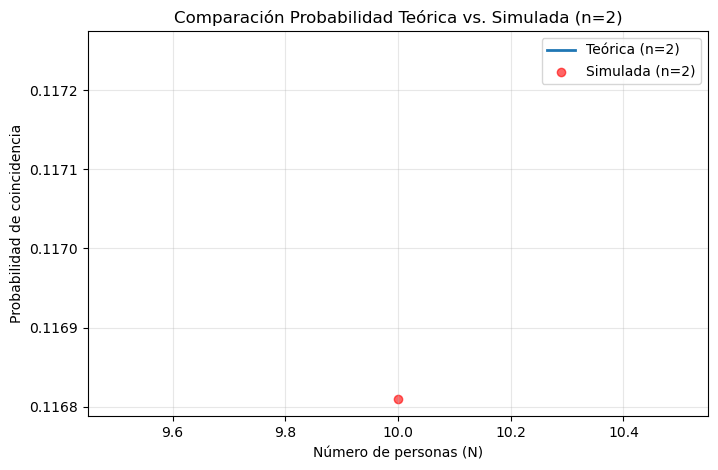

In [101]:
import matplotlib.pyplot as plt

# Valores de N para comparar (incrementos de 10 hasta 200)
N_values = list(range(10, 20, 10))
theoretical_probs = [theoretical_birthday_probability(N) for N in N_values]
simulated_probs = [simulate_birthday_paradox(N, n=2, trials=500000, seed=1) for N in N_values]

plt.figure(figsize=(8, 5))
plt.plot(N_values, theoretical_probs, label="Teórica (n=2)", linewidth=2)
plt.scatter(N_values, simulated_probs, color="red", alpha=0.6, label="Simulada (n=2)")
plt.title("Comparación Probabilidad Teórica vs. Simulada (n=2)")
plt.xlabel("Número de personas (N)")
plt.ylabel("Probabilidad de coincidencia")
plt.legend()
plt.grid(alpha=0.3)
plt.show()